<a href="https://colab.research.google.com/github/Klaudia2022/Obliczenianaukowe/blob/main/zajecia9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

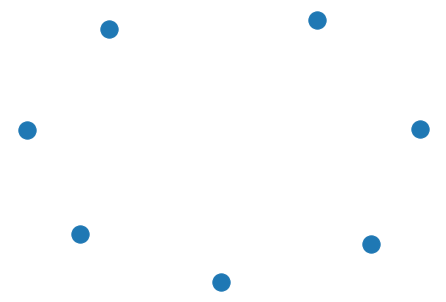

In [6]:
G=nx.Graph() #tworzenie obiektu grafu
G.add_node('a') #dodawanie wierzchołka, który nazywa się a (napis)
G.add_node(1, weight=5) #dodawanie wierzchołka , który nazywa się 1 (liczba) i jego atrybut 
G.add_nodes_from(['test','zabawa','Toruń',2,3])
nx.draw(G)

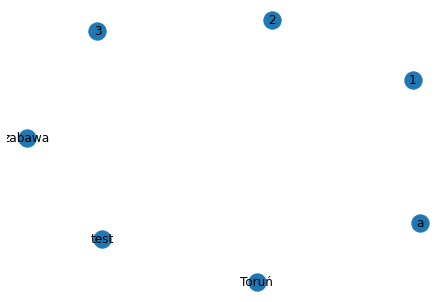

In [7]:
nx.draw(G, with_labels=True)

In [8]:
G.nodes #wynikiem nie jest lista!!!! 

NodeView(('a', 1, 'test', 'zabawa', 'Toruń', 2, 3))

In [9]:
list(G.nodes) #to już jest lista

['a', 1, 'test', 'zabawa', 'Toruń', 2, 3]

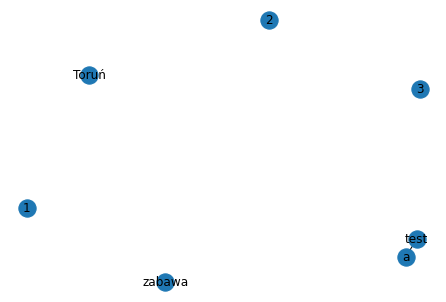

In [12]:
G.add_edge('a','test')
nx.draw(G, with_labels=True)

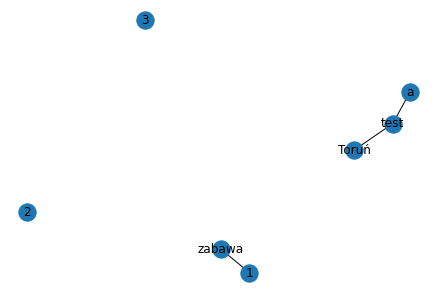

In [16]:
G.add_edges_from([('Toruń', 'test'),(1,'zabawa')])
nx.draw(G, with_labels=True)

In [18]:
H=nx.Graph([(1,2),(22,33),(11,33)])
H.edges

EdgeView([(1, 2), (22, 33), (33, 11)])

#Zadanie
Narysować graf, którego wierzchołakmi są litery mojego imienia, litery się nie mają powtarzać

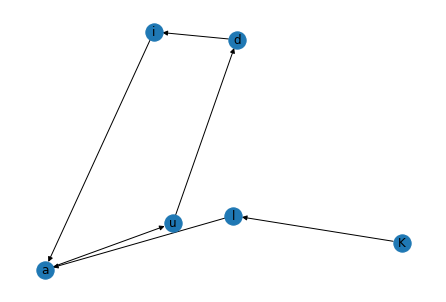

In [21]:
imie=nx.DiGraph()
imie.add_edges_from([('K','l'),('l','a'),('a','u'),('u','d'),('d','i'),('i','a')])
nx.draw(imie, with_labels=True)

#Zadanie 2

In [24]:
import requests
import json
data=requests.get('https://raw.githubusercontent.com/danio2010/ON2022/main/tokyo-metro.json').json()

In [27]:
metro=nx.Graph()

In [41]:
przesiadki=[]
for el in data.keys():    #data.keys() to nazwy linii metra
  przesiadki.extend(data[el]['transfers']) 

In [ ]:
przesiadki

In [43]:
polaczenia=[]
for el in data.keys():    #data.keys() to nazwy linii metra
  polaczenia.extend(data[el]['travel_times']) 

In [ ]:
polaczenia

In [51]:
metro.add_weighted_edges_from(polaczenia, transfer=False)
metro.add_edges_from(przesiadki, transfer=True)

In [ ]:
matro.adj['C3']   #z czym sąsiaduje C3, tablica sąsiedztwa

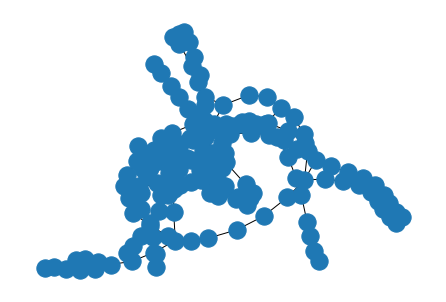

In [52]:
nx.draw(metro)

In [53]:
kolory=[data[stacja[0].upper()]["color"] for stacja in metro.nodes()]

In [ ]:
kolory

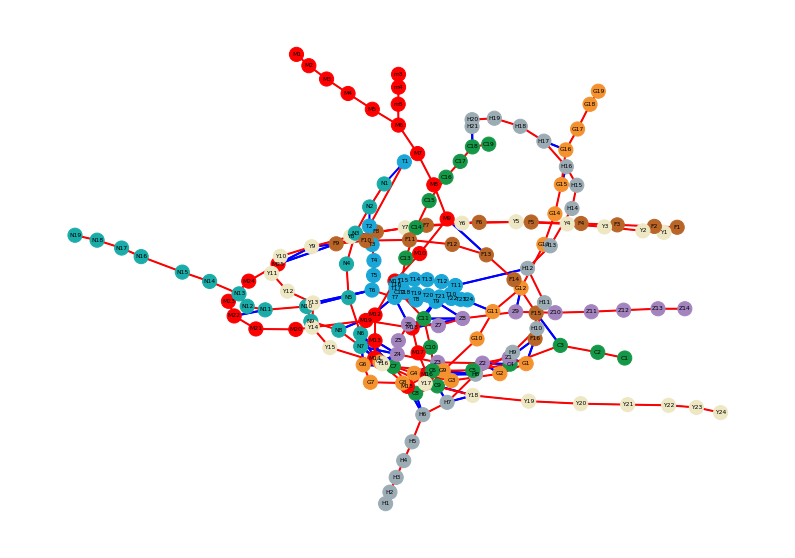

In [62]:
fig,osie=plt.subplots(1,1,figsize=(14,10))
pos_s=nx.spring_layout(metro)
pos=pos_s
nx.draw(metro,pos=pos,ax=osie,node_size=200,node_color=kolory)
nx.draw_networkx_labels(metro,pos=pos,ax=osie, font_size=6)
nx.draw_networkx_edges(metro, pos=pos,edgelist=przesiadki, width=2,edge_color='blue')
nx.draw_networkx_edges(metro, pos=pos,edgelist=polaczenia, width=2,edge_color='red')

In [65]:
lista=[]
wierzcholki=metro.degree()
for (n,d) in wierzcholki:
  if d==6:
    lista.append(n)

In [66]:
lista

['G5', 'M13', 'Y16', 'Z4', 'N7']

In [67]:
koniec=[]
for (n,d) in wierzcholki:
  if d==1:
    koniec.append(n)

In [74]:
najkrotsza=nx.shortest_path(metro,'C5','Y3')
